Under Sampling in Credit Card Fraud Detection

The data in input set is highly skewed towards the non-fradulent transaction. This makes classification tricky.  So in this kernel we can explore how undersampling will help to learn a better classifier. Also, we will be using recall as our evaluation metric as it's much for useful compared to accuracy score.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

creditcard.csv



In [2]:
## Read the data
df = pd.read_csv("../input/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


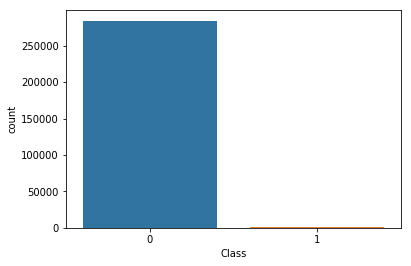

In [3]:
## Plot the distribution of data
%matplotlib inline
sns.countplot(x='Class', data=df)

From the above graph you can observe that data is really skewed for class 0 which indicates the non fradulant transactions.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

df['normal_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount','Time'], axis=1)
X = df.loc[:,df.columns != 'Class']
y = df.loc[:,df.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Below code trains a logisitc regression model on original data. As you can observe from the output,
recall is pretty poor. But accuracy is pretty high.

In [5]:
# Calculate the recall score for logistic Regression on Skewed data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(recall_score(y_test,y_pred,average=None))
print(accuracy_score(y_test,y_pred))


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.99985931  0.61904762]
0.999204147794


To improve the recall, let's implement undersampling. Here the code is trying to reduce the number
of non fraudulent transactions equivalent to fraudulent ones.

In [6]:
# Undersample the data
no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]

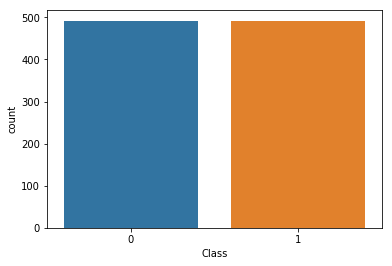

In [7]:
## Plot the distribution of data for undersampling
%matplotlib inline
sns.countplot(x='Class', data=under_sample)

In [8]:
X_under = under_sample.loc[:,under_sample.columns != 'Class']
y_under = under_sample.loc[:,under_sample.columns == 'Class']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

Below code trains the logistic regression on undersampled data. From the result, you can observe that the recall is much better.

In [9]:
lr_under = LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred = lr_under.predict(X_under_test)
print(recall_score(y_under_test,y_under_pred))
print(accuracy_score(y_under_test,y_under_pred))

0.925170068027
0.952702702703


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


It also generalises good enough for full data.

In [10]:
## Recall for the full data
y_pred_full = lr_under.predict(X_test)
print(recall_score(y_test,y_pred_full))
print(accuracy_score(y_test,y_pred_full))

0.925170068027
0.968212726613


Rather than doing sampling explicitely we can use class_weight property to achive the same effect.

In [11]:
lr_balanced = LogisticRegression(class_weight = 'balanced')
lr_balanced.fit(X_train,y_train)
y_balanced_pred = lr_balanced.predict(X_test)
print(recall_score(y_test,y_balanced_pred))
print(accuracy_score(y_test,y_balanced_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.91156462585
0.977177767635


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix_value = confusion_matrix(y_test,y_balanced_pred)

In [13]:
sns.set(font_scale=1.4)
confusion_matrix_value
#sns.heatmap(confusion_matrix_value, annot=True)

array([[83359,  1937],
       [   13,   134]])